In [ ]:
from feature_selection_utils import *
from supervised_utils import *
from neural_net_utils import *

### Feature selection per il task di regressione

In [8]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la regressione (con MSE 0.43)
best_model = joblib.load("models/Random_Forest_Reg-v2.joblib")

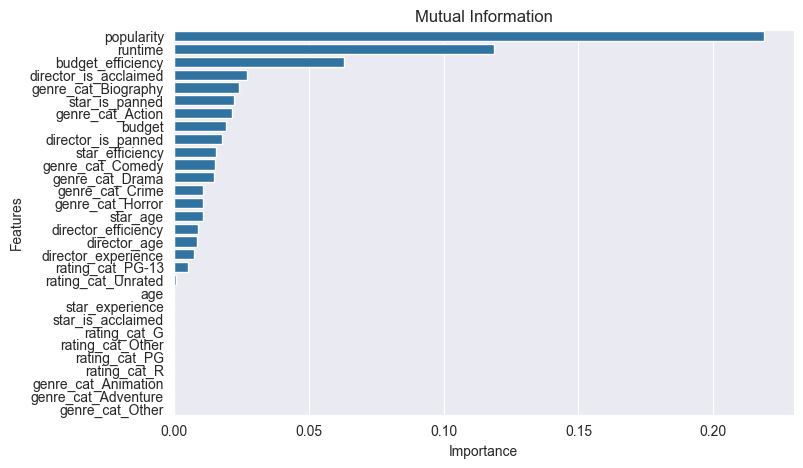

,feature,importance
2,popularity,0.218816
1,runtime,0.118859
4,budget_efficiency,0.063032
7,director_is_acclaimed,0.027121
24,genre_cat_Biography,0.024209
13,star_is_panned,0.022301
21,genre_cat_Action,0.021647
3,budget,0.019482
8,director_is_panned,0.017915
14,star_efficiency,0.015843


In [9]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="regression").head(15)

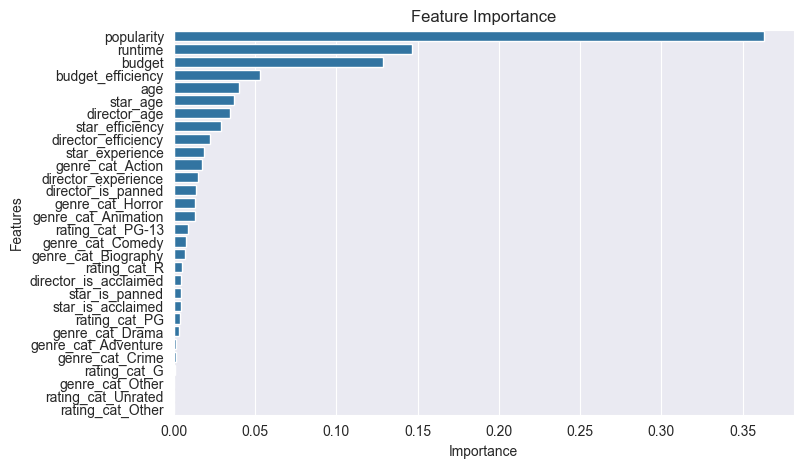

,feature,importance
2,popularity,0.363189
1,runtime,0.146476
3,budget,0.129070
4,budget_efficiency,0.053127
0,age,0.040301
10,star_age,0.036977
5,director_age,0.034802
14,star_efficiency,0.029354
9,director_efficiency,0.022105
11,star_experience,0.018840


In [10]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="regression").head(15)

In [11]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, best_model, k_features=15, task="regression")

+ Added popularity
+ Added runtime
+ Added budget
+ Added age
+ Added genre_cat_Animation
+ Added budget_efficiency
+ Added genre_cat_Action
+ Added genre_cat_Horror
+ Added genre_cat_Biography
+ Added rating_cat_PG-13
+ Added star_is_panned
+ Added rating_cat_PG
+ Added rating_cat_R
+ Added genre_cat_Comedy
+ Added star_is_acclaimed


,feature
0,popularity
1,runtime
2,budget
3,age
4,genre_cat_Animation
5,budget_efficiency
6,genre_cat_Action
7,genre_cat_Horror
8,genre_cat_Biography
9,rating_cat_PG-13


#### Sfida con la rete neurale feed-forward (su un sottoinsieme di features)

In [ ]:
best_features = ["popularity",
                 "runtime",
                 "budget",
                 "age",
                 "budget_efficiency",
                 "director_age",
                 "star_age",
                 "genre_cat_Animation",
                 "genre_cat_Action",
                 "genre_cat_Horror",
                 "rating_cat_PG-13"
                 "director_experience",
                 "star_experience",
                 "director_is_panned",
                 "star_is_panned"]

# training della rete
trainer = Trainer(df, cols, best_features, task="regression")
trainer.fit()
trainer.test()

### Feature selection per il task di classificazione

In [12]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "popularity"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la classificazione (con accuracy 53%)
best_model = joblib.load("models/Random_Forest_Cls-v2(resampled).joblib")

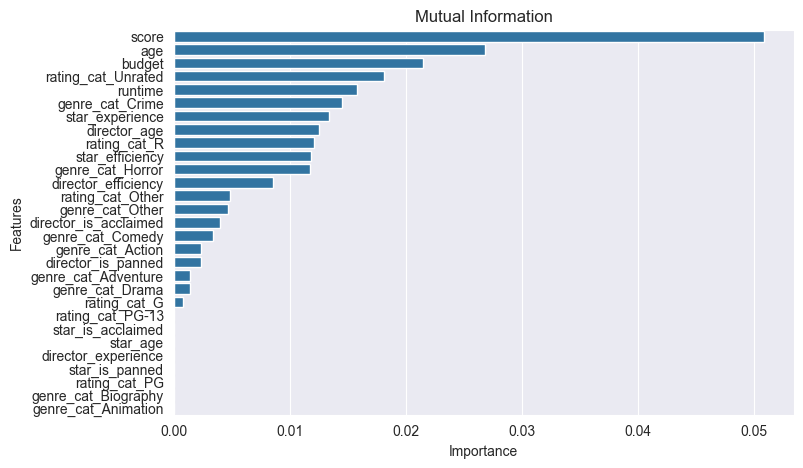

,feature,importance
2,score,0.050843
0,age,0.026828
3,budget,0.021447
19,rating_cat_Unrated,0.018117
1,runtime,0.015784
25,genre_cat_Crime,0.014456
10,star_experience,0.013411
4,director_age,0.012527
18,rating_cat_R,0.012063
13,star_efficiency,0.011855


In [13]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="classification").head(15)

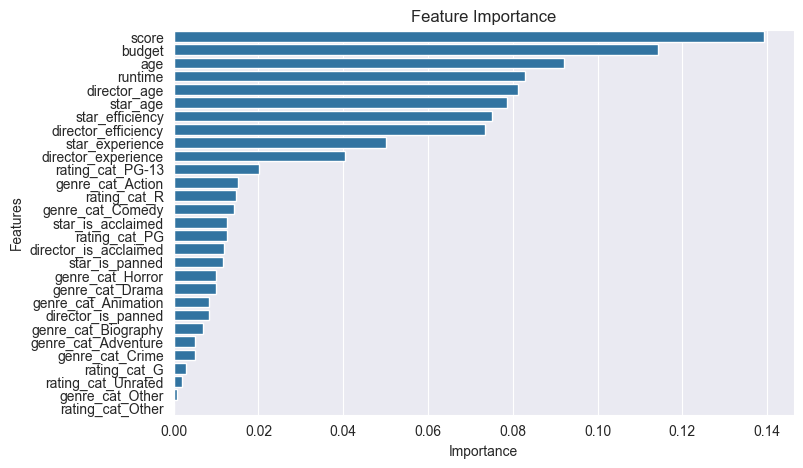

,feature,importance
2,score,0.139269
3,budget,0.114332
0,age,0.092055
1,runtime,0.082936
4,director_age,0.081110
9,star_age,0.078596
13,star_efficiency,0.075167
8,director_efficiency,0.073546
10,star_experience,0.050104
5,director_experience,0.040463


In [14]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="classification").head(15)

In [15]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, best_model, k_features=15, task="classification")

+ Added score
+ Added genre_cat_Horror
+ Added genre_cat_Crime
+ Added genre_cat_Biography
+ Added rating_cat_Unrated
+ Added genre_cat_Drama
+ Added budget
+ Added age
+ Added rating_cat_R
+ Added genre_cat_Animation
+ Added genre_cat_Adventure
+ Added star_is_panned
+ Added genre_cat_Comedy
+ Added genre_cat_Action
+ Added director_experience


,feature
0,score
1,genre_cat_Horror
2,genre_cat_Crime
3,genre_cat_Biography
4,rating_cat_Unrated
5,genre_cat_Drama
6,budget
7,age
8,rating_cat_R
9,genre_cat_Animation


#### Sfida con la rete neurale feed-forward (su un sottoinsieme di features)

In [ ]:
best_features = ["score",
                 "runtime",
                 "budget",
                 "age",
                 "director_age",
                 "star_age",
                 "director_efficiency",
                 "star_efficiency",
                 "director_experience",
                 "star_experience",
                 "genre_cat_Comedy",
                 "genre_cat_Drama",
                 "genre_cat_Horror",
                 "rating_cat_PG-13"
                 "rating_cat_R"]

# training della rete
trainer = Trainer(df, cols, best_features, task="classification")
trainer.fit()
trainer.test()